# Invesco QQQ ETF Stocks Technical Analysis

In [1]:
import numpy as np
import pandas as pd
from pandas import Timestamp
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import cufflinks as cf
import yfinance as yf
import re

init_notebook_mode(connected=True) # For Notebooks
cf.go_offline() # For offline use

## Step #1: Extract Data
- Steps:
1. Data Gathering from Yahoo Finance.
2. Data Integration


- Notes:
    - Aim: Analyse the performance of Ivesco QQQ ETF, 100 Companies. Check: https://www.invesco.com/qqq-etf/en/about.html
    - From Invesco Website, I got the QQQ (NASDAQ 100) Companies Tickers to download their data from yfinance.
    - NB: Check ETF Fact Cheet, Website Performance and insights tab.


### 1.1 - Data Gathering

In [2]:
Tickers = ['AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META', 'ASML', 'AVGO', 'PEP', 'COST', 
            'AZN', 'CSCO', 'TMUS', 'ADBE', 'TXN', 'AMD', 'CMCSA', 'NFLX', 'QCOM', 'HON', 'AMGN', 'INTU', 'INTC', 
            'SBUX', 'AMAT', 'GILD', 'PDD', 'ADI', 'BKNG', 'MDLZ', 'ADP', 'REGN', 'ISRG', 'PYPL', 'VRTX', 'ABNB', 
            'LRCX', 'MU', 'MELI', 'PANW', 'CSX', 'CHTR', 'SNPS', 'MRNA', 'CDNS', 'JD', 'KLAC', 'MNST', 'FTNT', 'ORLY', 
            'MAR', 'KDP', 'NXPI', 'KHC', 'MCHP', 'DXCM', 'CTAS', 'AEP', 'ADSK', 'IDXX', 'EXC', 'PAYX', 'BIIB', 'WDAY', 
            'LULU', 'PCAR', 'ODFL', 'MRVL', 'WBD', 'ROST', 'XEL', 'ILMN', 'CPRT', 'EA', 'CRWD', 'DLTR', 'CTSH', 'FAST', 
            'VRSK', 'ENPH', 'WBA', 'ANSS', 'BKR', 'CSGP', 'CEG', 'ALGN', 'FANG', 'TEAM', 'EBAY', 'DDOG', 'ZM', 'ZS', 
            'LCID', 'SIRI', 'TTD', 'ON', 'GFS']

# for i in range(len(File_content)):
#     store = File_content[i].replace("\n","")
#     Tickers.append(store)

### 1.2 - Data Integration Steps:
1. Download Tickers historical prices from yfinance.
2. Then employ **Data Integration**: merge all tickers data from yfinance into a coherent pandas data frame. 

In [3]:
# Download Stock Historical prices from yfinance
start_date = '2013-12-01'
end_date = '2023-12-01'

df= yf.download(Tickers, start=start_date, end=end_date, group_by = 'ticker')
df.columns.names = ["Stock Ticker", "Stock Info"] # Set Columns Name

C:\Users\yassi\AppData\Local\Temp\ipykernel_8156\3410265593.py:5: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  99 of 99 completed


## Step #2: Data Cleansing

1. Handling Missing Values
2. Dealing with duplicates
3. Standardizing Formate:
4. Handle Outliers: Identify and address outliers

### 2.1 - Handling Missing Data

In [4]:
# Fill All Missing data with zeros
df.fillna(0, inplace = True)

### 2.2 - Dealing with Duplicates


In [5]:
df.duplicated().sum() # Confirm no Data (Rows) duplication

0

### 2.4 - Handle Outliers: Identify and address outliers
- Calculate IQR: Say that intially you set the Threshold to 1.5 but you had 27 Tickers with outliers and when you manually
  inspected the values they weren't outliers. Hence you read more and found that in financial data, where volatility can be   higher. Some practitioners use a multiplier of 3 or more for financial data.
- Therefore, you set the threshold to 6 and you got 3 Tickers with outliers. When you manually inspected them they weren't outlier but ht estocks were very volatile at the phases were the algo identified them as outliers.


In [6]:
# To Check for Outliers: Calculate interquartile range (IQR) by finding diff between 3rd quartile (Q3) and 1st 
# quartile (Q1). Data points outside the range (Q1−3×IQR,Q3+3×IQR) are considered potential outliers.

# function checks for outliers in a column
def detect_outliers(cols):
    q1 = cols.quantile(0.25)
    q3 = cols.quantile(0.75)
    iqr = q3 - q1
    outlier_threshold = 6
    outliers = (cols < (q1 - outlier_threshold * iqr)) | (cols > (q3 + outlier_threshold * iqr))
    return outliers


for col in df.columns:     # Loop through each column in DataFrame
    if col[1] == "Volume": # Don't check for outliers in Volume column
        continue
    else:    
        outliers = detect_outliers(df[col])
        
        if outliers.any():
#             print(f"{col} has outliers.")
#             print(f"Outlier values in {col}:", df[col][outliers])
            pass

## Step #3: Data Transformation

In [7]:
# Generate a new dataframe for daily returns
df_daily_returns = pd.DataFrame()

for tick in Tickers:
    df_daily_returns[tick] = df[tick]['Close'].pct_change()

df_daily_returns = df_daily_returns[1:]   # Remove 1st column

df_daily_returns.fillna(0,inplace = True)  # Replace all NaN with Zeros

df_daily_returns.head()

AAPL      MSFT      GOOG     GOOGL      AMZN      NVDA  \
Date                                                                     
2013-12-03  0.027375 -0.003642 -0.001157 -0.001157 -0.019475 -0.000635   
2013-12-04 -0.002330  0.016445  0.004671  0.004671  0.003380  0.013977   
2013-12-05  0.005133 -0.024139 -0.000794 -0.000794 -0.003809 -0.016291   
2013-12-06 -0.013876  0.009474  0.011851  0.011850  0.006398 -0.014650   
2013-12-09  0.011446  0.009124  0.007730  0.007730 -0.005324 -0.016806   

                TSLA      META      ASML      AVGO  ...  TEAM      EBAY  DDOG  \
Date                                                ...                         
2013-12-03  0.165338 -0.007012  0.000427 -0.004889  ...   0.0  0.011295   0.0   
2013-12-04 -0.039737  0.040445 -0.024525 -0.006253  ...   0.0 -0.016175   0.0   
2013-12-05  0.011011 -0.005759 -0.003717  0.069438  ...   0.0  0.006263   0.0   
2013-12-06 -0.022209 -0.008275  0.003402 -0.013238  ...   0.0  0.011671   0.0   
2013-12-09  0.030868  0.018774  0.003827  0.008730  ...   0.0 -0.006153   0.0   

             ZM   ZS  LCID      SIRI  TTD        ON  GFS  
Date                                                      
2013-12-03  0.0  0.0   0.0 -0.007958  0.0  0.031250  0.0  
2013-12-04  0.0  0.0   0.0 -0.005347  0.0  0.019284  0.0  
2013-12-05  0.0  0.0   0.0 -0.008064  0.0  0.006757  0.0  
2013-12-06  0.0  0.0   0.0  0.000000  0.0  0.008054  0.0  
2013-12-09  0.0  0.0   0.0 -0.002710  0.0 -0.003995  0.0  

[5 rows x 99 columns]

## Step#4: Intial Data Analysis

1. Which stocks IPO took place on NASDAQ after 01/12/2013?
2. For each year, what is the annual return for the top-performing and bottom-ranked stock?
3. Which stocks had the highest and lowest overall return?
4. Which stocks experienced the highest daily percentage change between High and Low?
5. Which stock had the highest and lowest average daily trading volume?


### 4.1. Which stocks IPO took place on NASDAQ after 01/12/2013?

In [8]:
# Algorihtim to find Stocks IPO Date 

# Algo iterates through all the Tickers "Open" attribute data and returns a list of tuples [(Ticker, Date)] 
# Algo checks if stock ABC Open price changed from 0 to a value greater 0 , in 2 consective days.
# Hence the code will show me the 1st day the company ABC traded on NASDAQ (Had an OPEN value)

numb_r, numb_c = df.shape # Return (Numbof Rows, Numb of Cols)

index_list = df.index   # Generate a list of df index

sv = [] # PlaceHolder to Keep [(Ticker, Date)]

for x in range(len(Tickers)):
    for y in range(1,numb_r):
        if (df[Tickers[x]]["Open"].iloc[y-1] == 0.0):
            if (df[Tickers[x]]["Open"].iloc[y] > 0.0):
                sv.append((Tickers[x],index_list[y]))
            else:
                continue
        else:
            continue

In [9]:
import plotly.express as px

Stock = []
date = []

for i in range(len(sv)):
    Stock.append(sv[i][0])
    date.append(sv[i][1])

data = {"Stock":Stock,"date":date}

dfx = pd.DataFrame(data)

fig = px.scatter(dfx,x="date", y="Stock",color="Stock")

fig.update_traces(marker=dict(size=20, symbol="x"))
fig.update_layout(title="Timeline of Stocks IPO on NASDAQ",title_font_color = 'Navy',plot_bgcolor = 'White')
fig.update_xaxes(title='IPO Date',tickformat='%Y-%m-%d',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)
fig.update_yaxes(title='Stock Ticker',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)

fig.show()

### 4.2. For each year, what is the annual return for the top-performing and bottom-ranked stock?

- In the report, finding the return is **Data Mining** not Data Analysis. Therefore, aything that is linked with return 
classses it under Data Mining and anything that you used the already exiciting attributes is Data Analysis.
- The fact that I focused on yearly returns is called **Aggregation** ==> Summarise the data (daily sales data into monthly or yearly)

In [10]:
# Generate a new df for Adj Close of each Ticker

df_Adj_Close = pd.DataFrame() # Generate a new dF for Adj Close

for tick in Tickers:
    df_Adj_Close[tick] = df[tick]['Close']

In [11]:
# Steps
# 1. Generate a new df for Yealry Adj Close [from 01-12-2013 , 01-12-2014 to 01-12-2023]

Yearly_date = [Timestamp('2014-01-02 00:00:00'), Timestamp('2015-01-02 00:00:00'), Timestamp('2016-01-04 00:00:00'),
                 Timestamp('2017-01-03 00:00:00'), Timestamp('2018-01-02 00:00:00'), Timestamp('2019-01-02 00:00:00'),
                 Timestamp('2020-01-02 00:00:00'), Timestamp('2021-01-04 00:00:00'), Timestamp('2022-01-03 00:00:00'),
                 Timestamp('2023-01-03 00:00:00'), Timestamp('2023-11-30 00:00:00')]

df_Yearly_Adj_Close = df_Adj_Close.loc[[Yearly_date[0], Yearly_date[1],Yearly_date[2],Yearly_date[3],Yearly_date[4],
                                        Yearly_date[5],Yearly_date[6],Yearly_date[7],Yearly_date[8],
                                        Yearly_date[9],Yearly_date[10]]]
# df_Yearly_Adj_Close

In [12]:
# 2. Generate a new df for Yearly Adj Close Return

df_Yearly_Returns = pd.DataFrame()

for tick in Tickers:
    df_Yearly_Returns[tick] = df_Yearly_Adj_Close[tick].pct_change()
    
# df_Yearly_Returns.head()

In [13]:
# 3. Clean Data Frame
# First row is zero (NaN) bec for 1st value their is no previous price to compute percentage return
# Second, some values are 0 becuase of their IPO was in alter date, Hence in return equation (dividng by zero) resulted in inf
# Thereofre, I had to replace all inf values with zeros bec when I was trying to find the Max, the inf values where reported as the max.

df_Yearly_Returns.replace([np.inf, -np.inf,np.nan], 0 , inplace=True)


# df_Yearly_Returns_Flip = df_Yearly_Returns.transpose() # Flip Cols and row - better for filtering in Excel
# df_Yearly_Returns_Flip.to_csv("Yearly Returns.csv") # Generate a csv file

In [14]:
# 4. Algorithim: Find Ticker with Max and Min Yearly Return from 2014 to 2023

n_row, n_cols = df_Yearly_Returns.shape

Max_Yearly_Return = []
Min_Yearly_Return = []

for i in range(n_row):
    Max_Ticker = df_Yearly_Returns.iloc[i].idxmax()      # Find max value column (index) name
    Max_Y_Return = df_Yearly_Returns.iloc[i].max()       # Find max value
    Max_Yearly_Return.append((Max_Ticker,Max_Y_Return))
    
    Min_Ticker = df_Yearly_Returns.iloc[i].idxmin()      # Find min value column (index) name
    Min_Y_Return = df_Yearly_Returns.iloc[i].min()       # Find min value
    Min_Yearly_Return.append((Min_Ticker,Min_Y_Return))

Max_Yearly_Return = Max_Yearly_Return[1:] # Drop Values in index 0 bec (nan,nan)
Min_Yearly_Return = Min_Yearly_Return[1:] # Drop Values in index 0 bec (nan,nan)

In [15]:
# Plot: Top-Performing Stock Each Year in NASDAQ 100

import plotly.express as px

Stock = []
Y_Return = []
date = []

for i in range(len(Max_Yearly_Return)):
    Stock.append(Max_Yearly_Return[i][0])
    Y_Return.append(Max_Yearly_Return[i][1]*100) # *100 to make return %
    date.append(Yearly_date[i]) 
      
data = {"Stock":Stock, "Yearly Returns":Y_Return, "date":date}

dfx = pd.DataFrame(data)

fig = px.bar(dfx,x="date",y="Yearly Returns",color="Stock")

fig.update_layout(title="Yearly Top-Performing Stock",title_font_color = 'Navy',plot_bgcolor = 'White')
fig.update_yaxes(title='Yearly Returns (%)',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)
fig.update_xaxes(title='Year',tickformat='%Y',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)

fig.show()

In [16]:
# Plot: Bottom-Ranked Stock Each Year in NASDAQ 100

import plotly.express as px

Stock = []
Y_Return = []
date = []

for i in range(len(Max_Yearly_Return)):
    Stock.append(Min_Yearly_Return[i][0])
    Y_Return.append(Min_Yearly_Return[i][1]*100) # *100 to make return %
    date.append(Yearly_date[i])
      
data = {"Stock":Stock, "Yearly Returns":Y_Return, "date":date}

dfx = pd.DataFrame(data)

fig = px.bar(dfx,x="date",y="Yearly Returns",color="Stock")

fig.update_layout(title="Yearly Bottom-Ranked Stock",title_font_color = 'Navy',plot_bgcolor = 'White')
fig.update_yaxes(title='Yearly Returns (%)',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)
fig.update_xaxes(title='Year',tickformat='%Y',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)

fig.show()

### 4.3.	Which stocks had the highest and lowest overall return?

In [17]:
# Create a df of stocks price on 01-12-2013 and 30-11-2023, then calculate overall return.
# NB: This study only focused on the stocks that were on the sock market in the last 10 years.
# 1- Hence all stocks which IPO was after 01-12-2013 have been dropped from the study and their data was removed.

S_date = Timestamp('2013-12-02 00:00:00') # First Day
E_date = Timestamp('2023-11-30 00:00:00') # Last Day

# df for all tickers Adj Close on 1st and last day of study
df_temp = df_Adj_Close.loc[[S_date,E_date]]

df_cumul_return = pd.DataFrame() # Generate a new dF for Adj Close

for tick in Tickers:
    df_cumul_return[tick] = df_temp[tick].pct_change() # Caclulate return change

df_cumul_return.replace([np.inf, -np.inf], 0 , inplace=True) # replace all INF/-INF values with zeros
df_cumul_return.drop(index= S_date,inplace=True)             # drop first row as it is filled with NaN

df_cumul_return = df_cumul_return.transpose() # Transpose data and make it vertical - Easier to Read
df_cumul_return = df_cumul_return[E_date].sort_values(ascending=False) # Sort Column values Descending

print(f"Stocks with highest % returns:\n{df_cumul_return[0:3]*100}")
print("\n")
print(f"Stocks with lowest % returns:\n{df_cumul_return[-3:]*100}")


Stocks with highest % returns:
NVDA    12489.147763
AMD      3210.382536
TSLA     2800.217509
Name: 2023-11-30 00:00:00, dtype: float64


Stocks with lowest % returns:
BIIB   -20.607786
WBA    -53.319905
WBD    -76.278100
Name: 2023-11-30 00:00:00, dtype: float64


In [18]:
# # Stocks with Highest 10-Year Growth

# dfx = df_Adj_Close[["NVDA","AMD","TSLA"]]

# # Create subplot
# fig = make_subplots(rows=3, cols=1, subplot_titles=list(dfx.columns), 
#                     shared_xaxes=True,x_title="Price($)",y_title="Time")

# fig.add_trace(go.Scatter(x=dfx.index, y= dfx["NVDA"], name="NVDA"), row=1, col=1)
# fig.add_trace(go.Scatter(x=dfx.index, y= dfx["AMD"], name="AMD"), row=2, col=1)
# fig.add_trace(go.Scatter(x=df_Adj_Close.index, y= df_Adj_Close["TSLA"], name="TSLA"), row=3, col=1)

# # Update layout
# fig.update_layout(title="Stocks with Highest 10-Year Growth",title_font_color = 'Navy',plot_bgcolor = 'White')
# fig.update_xaxes(tickformat='%Y',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)
# fig.update_yaxes(linecolor='lightgrey',gridcolor='lightgrey',mirror=True)

# fig.show() # Show the plot

In [19]:
# Stocks with Highest 10-Year Growth
import plotly.express as px

# dfx = df_Adj_Close[["NVDA","AMD","TSLA","BIIB","WBA","WBD"]]
dfx = df_Adj_Close[["NVDA","AMD","TSLA"]]

fig = go.Figure() # Create traces

fig.add_trace(go.Scatter(x=dfx.index, y= dfx["NVDA"], name="NVDA"))
fig.add_trace(go.Scatter(x=dfx.index, y= dfx["AMD"], name="AMD"))
fig.add_trace(go.Scatter(x=dfx.index, y= dfx["TSLA"], name="TSLA"))

# Update layout
fig.update_layout(title="Stocks with the Highest Overall Return (from 01/12/2013 to 01/12/2023)",title_font_color = 'Navy',plot_bgcolor = 'White')
fig.update_xaxes(title="Time",tickformat='%Y',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)
fig.update_yaxes(title="Price($)",linecolor='lightgrey',gridcolor='lightgrey',mirror=True)

fig.show() # Show the plot

In [20]:
dff = df_cumul_return[["NVDA","AMD","TSLA"]]
dff = dff.mul(100) # Multiply by 100: To make it % change
dff = dff.round(3) # Round to 3 decimal places

ticker = dff.index.to_list() # Use index as Table headers
Cum_Return =  dff.to_list()        # Use values

# For Table Plot must convert header and data into dic
table_header = dict(values=["Stock Ticker","Overall Return (%)"])
table_data = dict(values=[ticker,Cum_Return])

fig = go.Figure()  # Create figure
fig.add_trace(go.Table(header=table_header, cells=table_data))

fig.show() # Display figure


In [21]:
dfx.corr()

# Create a correlation heatmap using Plotly Express
fig = px.imshow(dfx.corr(), x=dfx.columns, y=dfx.columns, 
                text_auto=True, color_continuous_scale='Plotly3')

# Update the layout for better visibility
fig.update_layout(title='Correlation Heatmap - Stocks with Highest Overall Return', width=600, height=500)

# Show the plot
fig.show()

In [22]:
# Stocks with lowest 10-Year Growth
import plotly.express as px

dfx = df_Adj_Close[["BIIB","WBA","WBD"]]

fig = go.Figure() # Create traces

fig.add_trace(go.Scatter(x=dfx.index, y= dfx["BIIB"], name="BIIB"))
fig.add_trace(go.Scatter(x=dfx.index, y= dfx["WBA"], name="WBA"))
fig.add_trace(go.Scatter(x=dfx.index, y= dfx["WBD"], name="WBD"))

# Update layout
fig.update_layout(title="Stocks with the Lowest Overall Return (from 01/12/2013 to 01/12/2023)",title_font_color = 'Navy',plot_bgcolor = 'White')
fig.update_xaxes(title="Time",tickformat='%Y',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)
fig.update_yaxes(title="Price($)",linecolor='lightgrey',gridcolor='lightgrey',mirror=True)

fig.show() # Show the plot

In [23]:
dff = df_cumul_return[["BIIB","WBA","WBD"]]
dff = dff.mul(100) # Multiply by 100: To make it % change
dff = dff.round(3) # Round to 3 decimal places

ticker = dff.index.to_list() # Use index as Table headers
Cum_Return =  dff.to_list()        # Use values

# For Table Plot must convert header and data into dic
table_header = dict(values=["Stock Ticker","Overall Return (%)"])
table_data = dict(values=[ticker,Cum_Return])

fig = go.Figure()  # Create figure
fig.add_trace(go.Table(header=table_header, cells=table_data))

fig.show() # Display figure

In [24]:
dfx.corr()

# Create a correlation heatmap using Plotly Express
fig = px.imshow(dfx.corr(), x=dfx.columns, y=dfx.columns, 
                text_auto=True, color_continuous_scale='Plotly3')

# Update the layout for better visibility
fig.update_layout(title='Correlation Heatmap - Stocks with Lowest Overall Return', width=600, height=500)

# Show the plot
fig.show()

### 4.4. Which stocks experienced the highest daily percentage change between High and Low?

In [25]:
# Algo: Genenrate a new attribute (High-low)/low *100
# 1. Calculate the average of daily difference between High and Low
# 2. Cleanse data by replacing all NaN/-NaN with zeros
# 3. Sort out the new column to determine stocks with the largest average change

df_High_Low = pd.DataFrame()

# Generate a new dF for difference between High and Low
for tick in Tickers:
    df_High_Low[tick] = ((df[tick]['High'] - df[tick]['Low'])/df[tick]['Low']) * 100

df_High_Low.replace([np.inf, -np.inf], 0 , inplace=True) # Replace all NaN/-NaN with zeros

diff = [] # Place Holder

for tick in Tickers:      # Generate ==> [(Ticker , Mean Difference between High and Low)]
    a = df_High_Low[tick].mean()
    diff.append(a)
    
# Generate a df for the average of the difference between high and low
data = {"Average (High-Low)": diff}
df_HL_mean = pd.DataFrame(data, index = Tickers)

# df_HL_mean.sort_values(by='Average (High-Low)', ascending = True, inplace=True)
df_HL_mean = df_HL_mean["Average (High-Low)"].sort_values(ascending = False)

Highest_Average_diff = df_HL_mean[0:10]
# Lowest_Average_diff = df_HL_mean[-20:]

In [26]:
# Display Top 10 Stoks with Highest (Daily) average difference between High and Low

fig = px.scatter(Highest_Average_diff, color=Highest_Average_diff.index)

fig.update_traces(marker=dict(size=15, symbol="circle-dot"))

fig.update_layout(title="Average Daily Percentage Change Between High and Low",title_font_color = 'Navy',
                    plot_bgcolor = 'White', width=950, height=600)

fig.update_xaxes(title='Stock Ticker',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)

fig.update_yaxes(title='Average Daily Price Volatility (%)',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)

fig.show()

### 4.5. Which stocks had the highest and lowest average daily trading volume?

In [27]:
df_vol = pd.DataFrame()

# Generate a new dF for Tickers Volume
for tick in Tickers:
    df_vol[tick] = df[tick]['Volume']

vol_mean = [] # Place Holder

for tick in Tickers:  # Generate ==> [(Ticker , Volum Mean)]
    a = df_vol[tick].mean()
    vol_mean.append(a)
    
# Generate a df for the Volume Mean
data = {"Average Volume": vol_mean}
df_vol_mean = pd.DataFrame(data, index = Tickers)

df_vol_mean_sort = df_vol_mean["Average Volume"].sort_values(ascending = False) # Sort Values Descedning

Highest_Av_Volume = df_vol_mean_sort[0:10]
Lowest__Av_Volume = df_vol_mean_sort[-10:]

Highest_Av_Volume_lst = Highest_Av_Volume.index.to_list() # List of Ticker with Highest Av Volume
Lowest__Av_Volume_lst = Lowest__Av_Volume.index.to_list() # List of Ticker with Lowest Av Volume

df_vol_Highest = df_vol[Highest_Av_Volume_lst] # Generate a df for the volume of the 5 Ticker with highest Volume
df_vol_Lowest = df_vol[Lowest__Av_Volume_lst]  # Generate a df for the volume of the 5 Ticker with lowest Volume

df_vol_Highest.head()

NVDA       AAPL       TSLA      AMZN       AMD     GOOGL  \
Date                                                                        
2013-12-02  373872000  472544800  116268000  94280000  24119700  54873072   
2013-12-03  290560000  450968000  385236000  74058000  23323200  66976956   
2013-12-04  493176000  377809600  197215500  47106000  21609700  47616336   
2013-12-05  271812000  447580000  139326000  38130000  14465700  45302652   
2013-12-06  281000000  344352400  118644000  39694000  15825300  57094848   

                GOOG       MSFT      INTC      AVGO  
Date                                                 
2013-12-02  55133884   42950400  25685300  24454000  
2013-12-03  67295297   52109800  35066400  16189000  
2013-12-04  47842656   51983600  43501500  26443000  
2013-12-05  45517975  116305000  45399100  45947000  
2013-12-06  57366220   36457300  53871400  27552000

In [28]:
df_vol_Highest["AAPL"].idxmax()

Timestamp('2014-01-28 00:00:00')

In [29]:
df_vol_Highest.loc['2014-01-28 00:00:00']

NVDA      167996000
AAPL     1065523200
TSLA       91401000
AMZN       57890000
AMD        27962600
GOOGL      88319592
GOOG       88739375
MSFT       36205500
INTC       32453800
AVGO       25223000
Name: 2014-01-28 00:00:00, dtype: int64

In [30]:
# Plot Stocks with Highest Trading Volume

# Reshape data for Violin plot
df_vol_Highest_melted = df_vol_Highest.melt(var_name='Ticker', value_name='Volume').reset_index()

# Create a violin plot using Plotly Express
fig = px.violin(df_vol_Highest_melted, x='Ticker', y='Volume', color="Ticker")

fig.update_layout(title="Stocks with Highest Average Daily Trading Volume",title_font_color = 'Navy',plot_bgcolor = 'White')
fig.update_xaxes(title='Stock Ticker',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)
fig.update_yaxes(title='Volume',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)

fig.show() # Show the plot

In [31]:
df_vol_Highest.describe()

NVDA          AAPL          TSLA          AMZN           AMD  \
count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
mean   4.576172e+08  1.389935e+08  1.134198e+08  8.026122e+07  5.455867e+07   
std    2.568011e+08  8.614737e+07  7.572676e+07  4.159089e+07  3.761285e+07   
min    4.564400e+07  2.404830e+07  1.062000e+07  1.762600e+07  0.000000e+00   
25%    2.925280e+08  8.229360e+07  6.643050e+07  5.395800e+07  2.887510e+07   
50%    4.022820e+08  1.134760e+08  9.315600e+07  6.887200e+07  4.808900e+07   
75%    5.519520e+08  1.691656e+08  1.329825e+08  9.292600e+07  7.282260e+07   
max    3.692928e+09  1.065523e+09  9.140820e+08  4.771220e+08  3.250584e+08   

              GOOGL          GOOG          MSFT          INTC          AVGO  
count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03  
mean   3.804201e+07  3.411902e+07  3.026481e+07  3.001253e+07  2.754927e+07  
std    2.015947e+07  1.907064e+07  1.402105e+07  1.499919e+07  2.185222e+07  
min    9.312000e+06  1.584340e+05  7.425600e+06  5.893800e+06  4.123000e+06  
25%    2.610800e+07  2.298720e+07  2.172840e+07  2.052500e+07  1.721500e+07  
50%    3.245800e+07  2.906400e+07  2.700480e+07  2.664620e+07  2.269200e+07  
75%    4.279720e+07  3.854600e+07  3.452480e+07  3.516000e+07  3.097000e+07  
max    2.571620e+08  2.234866e+08  2.025224e+08  1.822699e+08  5.602800e+08

In [32]:
# Stocks with Lowest Trading Volume

# Reshape data for Violin plot
df_vol_Lowest_melted = df_vol_Lowest.melt(var_name='Ticker', value_name='Volume').reset_index()

# Create a violin plot using Plotly Express
fig = px.violin(df_vol_Lowest_melted, x='Ticker', y='Volume', color="Ticker")


fig.update_layout(title="Stocks with Lowest Average Daily Trading Volume",title_font_color = 'Navy',plot_bgcolor = 'White')
fig.update_xaxes(title='Stock Ticker',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)
fig.update_yaxes(title='Volume',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)

fig.show() # Show the plot

In [33]:
df_vol_Lowest.describe()

SNPS          ALGN          VRSK          REGN          IDXX  \
count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
mean   9.192415e+05  9.166977e+05  8.900763e+05  8.330293e+05  5.798205e+05   
std    7.457031e+05  7.297605e+05  7.084902e+05  4.638955e+05  5.368498e+05   
min    2.002000e+05  1.412000e+05  1.450000e+05  1.210000e+04  6.950000e+04   
25%    6.255000e+05  5.643000e+05  5.887000e+05  5.658000e+05  3.754000e+05   
50%    8.114000e+05  7.727000e+05  7.755000e+05  7.351000e+05  4.847000e+05   
75%    1.071500e+06  1.075000e+06  1.024400e+06  9.712000e+05  6.550000e+05   
max    3.029460e+07  1.794020e+07  2.652600e+07  7.869500e+06  2.060650e+07   

               MELI          BKNG          ANSS           CEG           GFS  
count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03  
mean   5.793609e+05  4.916247e+05  4.768811e+05  4.230499e+05  4.137216e+05  
std    3.507221e+05  3.025289e+05  4.199012e+05  1.116362e+06  1.111337e+06  
min    1.090000e+05  9.730000e+04  1.326000e+05  0.000000e+00  0.000000e+00  
25%    3.687000e+05  3.074000e+05  3.213000e+05  0.000000e+00  0.000000e+00  
50%    4.994000e+05  4.104000e+05  4.132000e+05  0.000000e+00  0.000000e+00  
75%    6.811000e+05  5.788000e+05  5.483000e+05  0.000000e+00  0.000000e+00  
max    4.299500e+06  3.357200e+06  1.761340e+07  2.386090e+07  2.595340e+07

# 2. ML Algorithims
1. Regression 
2. Classification

## 5.1 - Regression Model #1
- Apply Multiple Linear Regression to find "Close" Price
- **Independet Variables**: Open, High, Low, Volume
    - Get ride of "Adj Close"
- **Dependednt Variables**: Close

In [34]:
# Steps:
# 1- Set dependednt variables --> Open High Low
# 2- Set Independent variable --> Close
# 3- Split the data into 2 subsets ==> 2/3 for Training and 1/3 for Testing
# 4- Determine the intercept and coeffeionsts

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

start_date = '2018-12-01'
end_date = '2023-12-01'

X = df['NVDA'][['Open', 'High', 'Low']].loc[start_date:end_date]
y = df['NVDA']['Close'].loc[start_date:end_date]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=79) # Split data to Train (2/3) and Test (1/3)

lm = LinearRegression() # Generate an Ordinary least squares (OLS) Linear Regression Model
lm.fit(X_train,y_train) # Train Model
predictions = lm.predict(X_test) # Generate predictions

# Multiple Linear Regression Model predict (^) Equation 
print("Multiple Linear Regression Equation:")
print("--------------------------------------")
print(f"Intercept = {lm.intercept_:2.6f}\n")  # y=mx+b ==> b is intercept
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(f"coeff: \n{coeff_df.head()}")

Multiple Linear Regression Equation:
--------------------------------------
Intercept = 0.007129

coeff: 
            Coefficient
Stock Info             
Open          -0.710998
High           0.916726
Low            0.792546


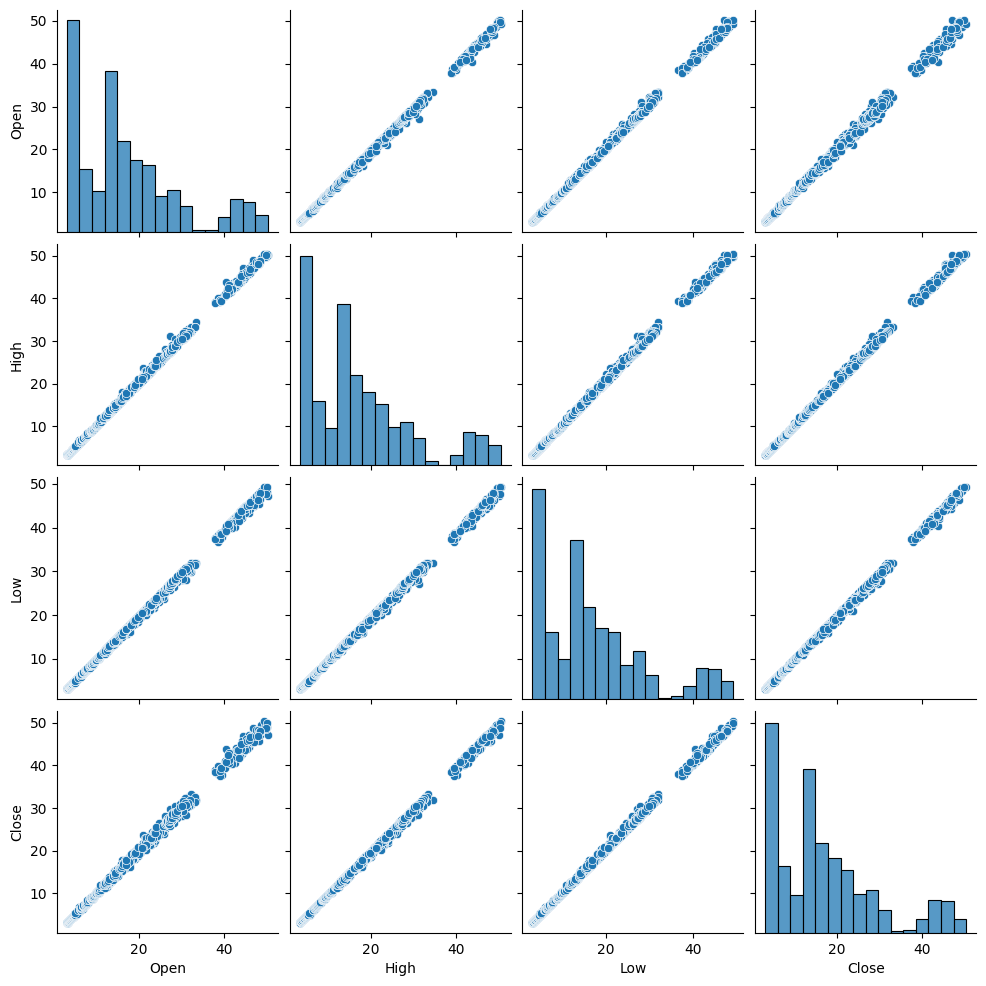

In [35]:
# Steps:
# 5- Confirm Independent and dependent variables relationship

df_NVDA = df['NVDA'][['Open', 'High', 'Low','Close']].loc[start_date:end_date]

sns.pairplot(df_NVDA) # Seaborn Library

In [36]:
# Steps:
# 6- Check for Multicollinearity by determining the correlation between model independent variables
# NB: Their should be No or little correlation between the independent variables
X.corr()


# Create a correlation heatmap using Plotly Express
fig = px.imshow(X.corr(), x=X.columns, y=X.columns, 
                text_auto=True)

fig.update_layout(title='Independent Variables Correlation Heatmap', width=600, height=500) # Update the layout for better visibility
fig.update_xaxes(title=' ') 
fig.update_yaxes(title=' ')

fig.show() # Show the plot

In [37]:
# Steps:
# 7- Plot the relation between the Close Actual and Predicted Price.
# 8- For the trendline, I used OLS to decrese the squared differece between the Close Price 
#    actual values and the values predicted by my model

fig = px.scatter(x=y_test, y=predictions,trendline="ols") # Trend Line fit is OLS (Ordinary Least Square)

fig.update_layout(title="NVDA 'Close' Price - Multiple Linear Regression",title_font_color = 'Navy',plot_bgcolor = 'White')
fig.update_xaxes(title='Actual Close ($)',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)
fig.update_yaxes(title='Predicted Close ($)',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)

fig.show()

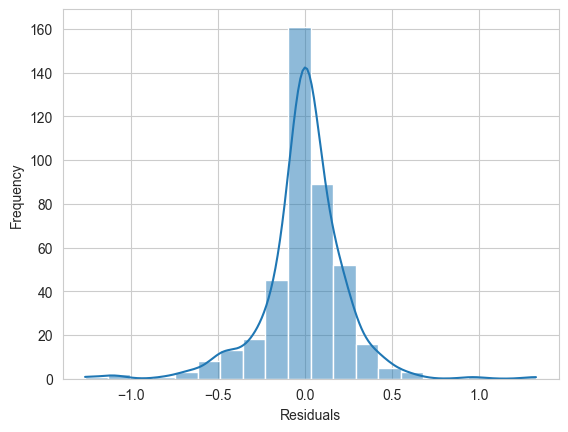

In [38]:
# Steps:
# 9- Calculate Residuals ==> Actual - Predicted
# 10- Plot Resdiuals Histogram to confirm that errors are normally distrbuted
# NB: If reiduals are normally distrubted that means that your model was a correct choice for the data

Residuals = y_test-predictions

sns.set_style('whitegrid')
sns.histplot(Residuals,bins=20,kde=True);

plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.show()

In [39]:
# Steps: Cost Functions
# 11 - Cacluate metrics to measure difference between Actual and Predicted Value

print("Multiple Linear Regression Model Metrics: ")
print("-----------------------------------------")
print(f'Mean Squared Error (MSE): {metrics.mean_squared_error(y_test, predictions):2.3f}')
# print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions)):2.3f}')
print(f'Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_test, predictions):2.3f}')
# print(f'R^2: {metrics.r2_score(y_test, predictions):2.3f}')
print(f'Coefficient of Determination (R^2): {metrics.r2_score(y_test, predictions):1.6f}')

Multiple Linear Regression Model Metrics: 
-----------------------------------------
Mean Squared Error (MSE): 0.057
Mean Absolute Error (MAE): 0.153
Coefficient of Determination (R^2): 0.999608


## 5.1 - Regression Model #2
- In Model #2, Dimensionality Reduction: PCA WAS used to transform correlated variables into a smaller number of uncorrelated variables. Hence rather than using High and Low as independent variables, I will use their difference "High -Low"
- **Independet Variables**: Open, "High - Low"
    - Get ride of "Adj Close"
- **Dependednt Variables**: Close

In [40]:
# Steps:
# 1- Set dependednt variables --> Open High Low
# 2- Set Independent variable --> Close
# 3- Split the data into 2 subsets ==> 2/3 for Training and 1/3 for Testing
# 4- Determine the intercept and coeffeionsts

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

start_date = '2018-12-01'
end_date = '2023-12-01'

A = df['NVDA'][['Open', 'High', 'Low']].loc[start_date:end_date]
A['High - Low'] = A['High'] - A['Low'] # Add column of difference between High and Low

X = A[['Open', 'High - Low']]
y = df['NVDA']['Close'].loc[start_date:end_date]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=79) # Split data to Train (2/3) and Test (1/3)

lm = LinearRegression() # Generate an Ordinary least squares (OLS) Linear Regression Model
lm.fit(X_train,y_train) # Train Model
predictions = lm.predict(X_test) # Generate predictions

# Multiple Linear Regression Model predict (^) Equation 
print("Multiple Linear Regression Equation:")
print("--------------------------------------")
print(f"Intercept = {lm.intercept_:2.6f}\n")  # y=mx+b ==> b is intercept
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(f"coeff: \n{coeff_df.head()}")

Multiple Linear Regression Equation:
--------------------------------------
Intercept = 0.032374

coeff: 
            Coefficient
Stock Info             
Open           0.994982
High - Low     0.095309


In [41]:
# Steps:
# 5- Check for Multicollinearity by determining the correlation between model independent variables
# NB: Their should be No or little correlation between the independent variables
X.corr()


Stock Info      Open  High - Low
Stock Info                      
Open        1.000000    0.756778
High - Low  0.756778    1.000000

In [42]:
# Steps:
# 6- Plot the relation between the Close Actual and Predicted Price.
# 7- For the trendline, I used OLS to decrese the squared differece between the Close Price 
# actual values and the values predicted by my model

fig = px.scatter(x=y_test, y=predictions,trendline="ols") # Trend Line fit is OLS (Ordinary Least Square)

fig.update_layout(title="NVDA 'Close' Price - Multiple Linear Regression",title_font_color = 'Navy',plot_bgcolor = 'White')
fig.update_xaxes(title='Actual Close ($)',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)
fig.update_yaxes(title='Predicted Close ($)',linecolor='lightgrey',gridcolor='lightgrey',mirror=True)

fig.show()

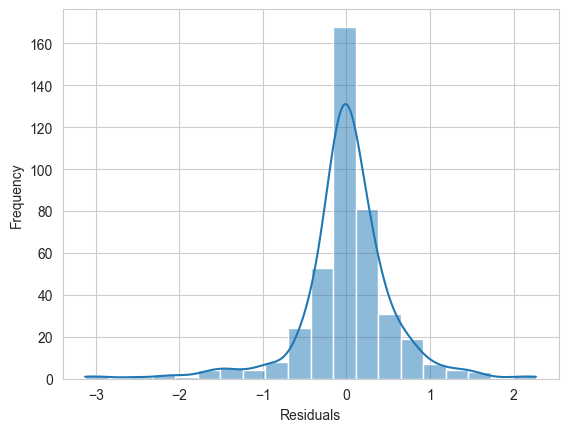

In [43]:
# Steps:
# 8- Calculate Residuals ==> Actual - Predicted
# 9- Plot Resdiuals Histogram to confirm that errors are normally distrbuted
# NB: If reiduals are normally distrubted that means that your model was a correct choice for the data

Residuals = y_test-predictions

sns.set_style('whitegrid')
sns.histplot(Residuals,bins=20,kde=True);

plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.show()

In [44]:
# Steps: Cost Functions
# 10 - Cacluate metrics to measure difference between Actual and Predicted Value

print("Multiple Linear Regression Model Metrics: ")
print("-----------------------------------------")
print(f'Mean Squared Error (MSE): {metrics.mean_squared_error(y_test, predictions):2.3f}')
# print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions)):2.3f}')
print(f'Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_test, predictions):2.3f}')
# print(f'R^2: {metrics.r2_score(y_test, predictions):2.3f}')
print(f'Coefficient of Determination (R^2): {metrics.r2_score(y_test, predictions):1.6f}')

Multiple Linear Regression Model Metrics: 
-----------------------------------------
Mean Squared Error (MSE): 0.323
Mean Absolute Error (MAE): 0.349
Coefficient of Determination (R^2): 0.997770


## 5.2 - Classification Model
1. Majority Class Classifier
2. K Nearest Neighbour
3. Decision Tree

### 5.2.1 - Majority Class Classifier (Dummy Classifier)

In [45]:
# Steps:
# 1 - Use Dummy Encoding to generate a Binary attribute (IsProfitable) from (Close - Open)
# 2 - Set dependednt variables --> Open High Low
# 3 - Set Independent variable --> IsProfitable

# Notes:
# 1 ==> Profitable 
# 0 ==> Not Profitable

start_date = '2013-12-01'
end_date = '2023-12-01'

# Generate df
df_IsProf = df['NVDA'][['Open', 'Close','High','Low']].loc[start_date:end_date]

# Set Is_Profitable Column value to 1 [True] or 0 [False] based on ==> df_IsProf['Close'] - df_IsProf['Open'] > 0
df_IsProf["IsProfitable"] = np.where((df_IsProf['Close'] - df_IsProf['Open']) > 0, 1, 0)

X = df_IsProf[['Open', 'High', 'Low']] # Independednt Variables
y = df_IsProf['IsProfitable']          # dependent variables

df_IsProf.head()

Stock Info      Open     Close      High       Low  IsProfitable
Date                                                            
2013-12-02  0.366362  0.371313  0.373906  0.365654             1
2013-12-03  0.371313  0.371077  0.376263  0.368719             0
2013-12-04  0.370134  0.376263  0.376971  0.369191             1
2013-12-05  0.376971  0.370134  0.376971  0.369662             0
2013-12-06  0.374613  0.364711  0.374613  0.363768             0

In [46]:
# Steps:
# 4 - Fit the model
# 5 - Compute model's confusuon Matrix and Classification Report

from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report,confusion_matrix

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
pred = dummy_clf.predict(X)

# Dummy_Acc = dummy_clf.score(X, y)
# print(f"Accuracy = {Dummy_Acc*100:2.2f}%")

print("Majority Class Classifier - Confusion Matrix:")
print("----------------------------------------------------")
print(f"{confusion_matrix(y,pred)}")
print(" \n")
print("Majority Class Classifier - Classification Report:")
print("----------------------------------------------------")
print(classification_report(y,pred, zero_division=0))

Majority Class Classifier - Confusion Matrix:
----------------------------------------------------
[[   0 1212]
 [   0 1305]]
 

Majority Class Classifier - Classification Report:
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1212
           1       0.52      1.00      0.68      1305

    accuracy                           0.52      2517
   macro avg       0.26      0.50      0.34      2517
weighted avg       0.27      0.52      0.35      2517



### 5.2.2 - K Nearest Neighbors

In [47]:
# Steps:
# 1 - Use Dummy Encoding to generate a Binary attribute (IsProfitable) from (Close - Open)
# 2 - Set dependednt variables --> Open High Low
# 3 - Set Independent variable --> IsProfitable

# Notes:
# 1 ==> Profitable 
# 0 ==> Not Profitable

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

start_date = '2013-12-01'
end_date = '2023-12-01'

df_IsProf = df['NVDA'][['Open', 'Close','High','Low']].loc[start_date:end_date] # Generate df

# Set Is_Profitable Column value to 1 [True] or 0 [False] based on ==> df_IsProf['Close'] - df_IsProf['Open'] > 0
df_IsProf["IsProfitable"] = np.where((df_IsProf['Close'] - df_IsProf['Open']) > 0, 1, 0)

df_IsProf.drop("Close",axis=1,inplace= True) # Permenantly drop "Close" Column

df_IsProf.head()

Stock Info      Open      High       Low  IsProfitable
Date                                                  
2013-12-02  0.366362  0.373906  0.365654             1
2013-12-03  0.371313  0.376263  0.368719             0
2013-12-04  0.370134  0.376971  0.369191             1
2013-12-05  0.376971  0.376971  0.369662             0
2013-12-06  0.374613  0.374613  0.363768             0

In [48]:
# Steps: 
# 2. Develop a script to check if "IsProfitable" is Oversampled or Undersampled

value_counts_result = df_IsProf["IsProfitable"].value_counts()

count_of_zeros = value_counts_result[0]
count_of_ones = value_counts_result[1]

Perc_Zeros = (count_of_zeros/(count_of_ones+count_of_zeros))*100
Perc_Ones = (count_of_ones/(count_of_ones+count_of_zeros))*100

print(f"Count of Zeros = {count_of_zeros} ({Perc_Ones:2.2f}%)")
print(f"Count of Ones = {count_of_ones} ({Perc_Zeros:2.2f}%)")

print("Hence, No Class Imbalance")

Count of Zeros = 1212 (51.85%)
Count of Ones = 1305 (48.15%)
Hence, No Class Imbalance


In [49]:
# Steps: 
# 3. Normalization/Scaling: normalise all columns other than Target (IsProfitable)

from sklearn.preprocessing import StandardScaler

df_input = df_IsProf.drop('IsProfitable',axis=1)

scaler = StandardScaler()
scaler.fit(df_input)   # Calculate Mean and Std for normalization later

scaled_features = scaler.transform(df_input) # Apply Normalization 

df_feat = pd.DataFrame(scaled_features,columns=df_input.columns)

df_feat.head()

Stock Info      Open      High       Low
0          -0.820008 -0.820307 -0.819732
1          -0.819570 -0.820102 -0.819456
2          -0.819675 -0.820041 -0.819414
3          -0.819071 -0.820041 -0.819371
4          -0.819279 -0.820245 -0.819902

In [50]:
# Steps:
# 4. Split the data into 2 subsets ==> 2/3 for Training and 1/3 for Testing
# 5. Apply Elbow Method to determine optimum K value

X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_IsProf['IsProfitable'], 
                                                    test_size=0.333,random_state=2)

error_rate = [] # Place Holder

K_values = list(range(1,16))

for i in K_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

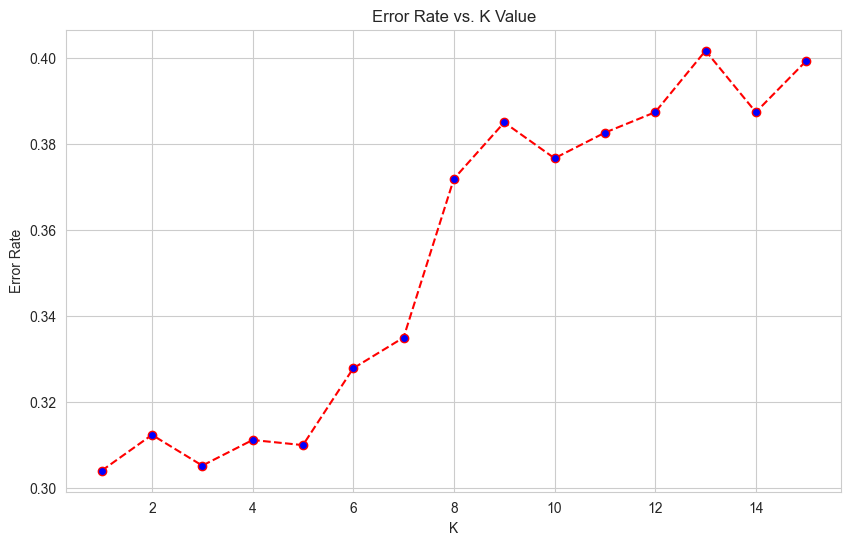

In [51]:
# Plot Elbow graph

plt.figure(figsize=(10,6))
plt.plot(K_values,error_rate,color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [52]:
# Steps
# 6. Apply model for K=3 [As can be observed from Elbow graph, k=3 have the lowest Error rate]
# 7. Compute model's confusuon Matrix and Classification Report
K=3

knn = KNeighborsClassifier(n_neighbors=K,p=2)  # Use euclidean_distance (p=2)
knn.fit(X_train,y_train)

pred = knn.predict(X_test)

print(f"K Nearest Neighbors (K = {K}) - Confusion Matrix:")
print("----------------------------------------------------")
print(f"{confusion_matrix(y_test,pred)}\n")
print(f"K Nearest Neighbors (K = {K}) - Classification Report:")
print("----------------------------------------------------")
print(f"{classification_report(y_test,pred)}\n")

K Nearest Neighbors (K = 3) - Confusion Matrix:
----------------------------------------------------
[[279 146]
 [110 304]]

K Nearest Neighbors (K = 3) - Classification Report:
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       425
           1       0.68      0.73      0.70       414

    accuracy                           0.69       839
   macro avg       0.70      0.70      0.69       839
weighted avg       0.70      0.69      0.69       839




In [53]:
# Steps:
# 8 - Apply Majority Class Classifer to evaluate the KNN perfomance.
# NB: Must use the same test dataset

from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report,confusion_matrix

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,y_train)
pred = dummy_clf.predict(X_test)

# Dummy_Acc = dummy_clf.score(X, y)
# print(f"Accuracy = {Dummy_Acc*100:2.2f}%")

print("Majority Class Classifier - Confusion Matrix:")
print("----------------------------------------------------")
print(f"{confusion_matrix(y_test,pred)}")
print(" \n")
print("Majority Class Classifier - Classification Report:")
print("----------------------------------------------------")
print(f"{classification_report(y_test,pred, zero_division=0)}\n")

Majority Class Classifier - Confusion Matrix:
----------------------------------------------------
[[  0 425]
 [  0 414]]
 

Majority Class Classifier - Classification Report:
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       425
           1       0.49      1.00      0.66       414

    accuracy                           0.49       839
   macro avg       0.25      0.50      0.33       839
weighted avg       0.24      0.49      0.33       839




### 5.2.3 - Decision Tree 

In [54]:
# Steps:
# 1 - Use Dummy Encoding to generate a Binary attribute (IsProfitable) from (Close - Open)
# 2 - Set dependednt variables --> Open High Low
# 3 - Set Independent variable --> IsProfitable

# Notes:
# 1 ==> Profitable 
# 0 ==> Not Profitable

start_date = '2018-12-01'
end_date = '2023-12-01'

# Generate a pandas dataframe
df_IsProf = df['NVDA'][['Open', 'Close','High','Low']].loc[start_date:end_date]

# Set Is_Profitable Column value to 1 [True] or 0 [False] based on ==> df_IsProf['Close'] - df_IsProf['Open'] > 0
df_IsProf["IsProfitable"] = np.where((df_IsProf['Close'] - df_IsProf['Open']) > 0, 1, 0)

X = df_IsProf[['Open', 'High', 'Low']]
y = df_IsProf['IsProfitable']

df_IsProf.head()

Stock Info      Open     Close      High       Low  IsProfitable
Date                                                            
2018-12-03  4.279579  4.216104  4.331152  4.149158             0
2018-12-04  4.171473  3.895508  4.176433  3.880383             0
2018-12-06  3.754921  3.924766  3.929725  3.739301             1
2018-12-07  3.928981  3.659957  3.939146  3.610616             0
2018-12-10  3.615079  3.765335  3.790130  3.611359             1

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=3)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)

print(f"Decision Tree (K = {K}) - Confusion Matrix:")
print("----------------------------------------------------")
print(f"{confusion_matrix(y_test,pred)}\n")
print(f"Decision Tree (K = {K}) - Classification Report:")
print("----------------------------------------------------")
print(f"{classification_report(y_test,pred)}\n")

Decision Tree (K = 3) - Confusion Matrix:
----------------------------------------------------
[[138  67]
 [ 64 150]]

Decision Tree (K = 3) - Classification Report:
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       205
           1       0.69      0.70      0.70       214

    accuracy                           0.69       419
   macro avg       0.69      0.69      0.69       419
weighted avg       0.69      0.69      0.69       419


